# Preprocessing

Imports

In [51]:
# Basic Imports
import pandas as pd
import numpy as np

# Scikit-Learn Imports
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error as mse
from sklearn.inspection import permutation_importance

# Graphing
import seaborn as sns
import matplotlib.pyplot as plt

# Utilities
from tqdm import tqdm

# Configs
sns.set_theme()

File import

In [52]:
filename = 'sales_data.csv'
df_original = pd.read_csv(filename, index_col=0)
df_original.head()

,index,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [53]:
df = df_original.copy()
df.drop(columns=['index'], inplace=True)

### Scaling Continuous Variables
Scaling should be done on non-categorical features. Non-categorical features should be isolated first, scaled, then merged back into the dataframe.

Including categorical features in the scaling process harms model performance

Isolating and scaling non-categorical featres.

In [54]:
categorical_columns = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 
                       'Outlet_Type', 'Item_Type']
df_categorical = df[categorical_columns]

# Separating the target vector and dropping unique categorical data.
target_vector = df['Item_Outlet_Sales'].values
target_vector_normalized = (df['Item_Outlet_Sales']/df['Item_MRP']).values
drop_columns = ['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier']

# Dropping categorical features and the target vector.
df.drop(columns=drop_columns, inplace=True)
df.drop(columns=categorical_columns, inplace=True)

# Scaling
scaler = StandardScaler()
scaler.fit(df.values)
features = scaler.transform(df.values)

# Merging scaled features and categorical features.
df_scaled = pd.DataFrame(features, columns=df.columns)
df_scaled = pd.concat([df_scaled, df_categorical], axis=1)
df = pd.concat([df, df_categorical], axis=1)  # Non-scaled df for decision trees.

In [55]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type
0,9.30,0.016047,249.8092,1999,Low Fat,Medium,Tier 1,Supermarket Type1,Dairy
1,5.92,0.019278,48.2692,2009,Regular,Medium,Tier 3,Supermarket Type2,Soft Drinks
2,17.50,0.016760,141.6180,1999,Low Fat,Medium,Tier 1,Supermarket Type1,Meat
3,19.20,0.000000,182.0950,1998,Regular,Medium,Tier 3,Grocery Store,Fruits and Vegetables
4,8.93,0.000000,53.8614,1987,Low Fat,High,Tier 3,Supermarket Type1,Household


In [56]:
df_scaled.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type
0,-0.819320,-1.038082,1.937364,0.083500,Low Fat,Medium,Tier 1,Supermarket Type1,Dairy
1,-1.601619,-0.952872,-1.436060,1.303091,Regular,Medium,Tier 3,Supermarket Type2,Soft Drinks
2,1.078567,-1.019284,0.126434,0.083500,Low Fat,Medium,Tier 1,Supermarket Type1,Meat
3,1.472031,-1.461305,0.803948,-0.038459,Regular,Medium,Tier 3,Grocery Store,Fruits and Vegetables
4,-0.904956,-1.461305,-1.342457,-1.380009,Low Fat,High,Tier 3,Supermarket Type1,Household


### Nominal and Ordinal Variables

Ordinal Categorical Variables

In [57]:
ordinal_dicts = [
    {'Low Fat': 0, 'Regular': 1},
    {'Small': 0, 'Medium': 1, 'High': 2},
    {'Tier 1': 0, 'Tier 2': 1, 'Tier 3': 2},
    {'Grocery Store': 0, 'Supermarket Type1': 1, 'Supermarket Type2': 2, 'Supermarket Type3': 3}
]
ordinal_dict_labels = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for index, ordinal_dict in enumerate(ordinal_dicts):
    df[ordinal_dict_labels[index]].replace(to_replace=ordinal_dict, inplace=True)
    df_scaled[ordinal_dict_labels[index]].replace(to_replace=ordinal_dict, inplace=True)

In [58]:
df_scaled[ordinal_dict_labels].head()

,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0,1,0,1
1,1,1,2,2
2,0,1,0,1
3,1,1,2,0
4,0,2,2,1


In [59]:
df[ordinal_dict_labels].head()

,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0,1,0,1
1,1,1,2,2
2,0,1,0,1
3,1,1,2,0
4,0,2,2,1


Nominal Categorical Variables

In [60]:
nominal_columns = ['Item_Type']
df = pd.get_dummies(data=df, columns=nominal_columns, drop_first=True)
df_scaled = pd.get_dummies(data=df_scaled, columns=nominal_columns, drop_first=True)

In [61]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0.016047,249.8092,1999,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,0.019278,48.2692,2009,1,1,2,2,0,0,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0.016760,141.6180,1999,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,19.20,0.000000,182.0950,1998,1,1,2,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,1987,0,2,2,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [62]:
df_scaled.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,-0.819320,-1.038082,1.937364,0.083500,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.601619,-0.952872,-1.436060,1.303091,1,1,2,2,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1.078567,-1.019284,0.126434,0.083500,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1.472031,-1.461305,0.803948,-0.038459,1,1,2,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,-0.904956,-1.461305,-1.342457,-1.380009,0,2,2,1,0,0,...,0,0,0,1,0,0,0,0,0,0


# Models with limited hyperparameter tuning

In [63]:
# Defining feature matrix, target vector, and train/test split.
X = df_scaled.to_numpy()
y = target_vector
X_train, X_test, y_train, y_test = tts(X, y, random_state=42)

#### KNN Regressor Model

In [64]:
knn_range = list(range(1,10,1)) + list(range(10, 50, 10)) + list(range(50, 500+1, 50))
knn_rsquared = []
knn_rmse = []
knn_pred_dict = {}
for n_neighbors in tqdm(knn_range):
    knn = KNeighborsRegressor(n_neighbors=n_neighbors, n_jobs=-1)
    knn.fit(X_train, y_train)
    knn_rsquared.append(knn.score(X_test, y_test)) 
    knn_predictions = knn.predict(X_test) # Note, call this instead with best fit n
    knn_pred_dict[n_neighbors] = knn_predictions
    knn_rmse.append(mse(y_true=y_test, y_pred=knn_predictions, squared=False))
    
# This is required to calculate feature importances later.
knn_30 = KNeighborsRegressor(n_neighbors=30, n_jobs=-1)
knn_30.fit(X_train, y_train)
knn_30_rmse = mse(y_true=y_test, y_pred=knn_pred_dict[30], squared=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:10<00:00,  2.21it/s]


#### Linear Regression Model

In [65]:
reg = LinearRegression()
reg.fit(X_train, y_train)
reg_rsquared= reg.score(X_test, y_test)
reg_predictions = reg.predict(X_test)
reg_rmse = mse(y_true=y_test, y_pred=reg_predictions, squared=False)

### Decision Tree Regression Models

In [66]:
X = df.to_numpy()
y = target_vector
X_train, X_test, y_train, y_test = tts(X, y, random_state=42)

####     Random Forest

In [67]:
estimators_range = list(range(10,100, 10)) + list(range(100, 300, 50)) + list(range(300, 500+1, 100))
regrf_rsquared = []
regrf_rmse =[]
regrf_pred_dict = {}
for n_estimator in tqdm(estimators_range):
    regrf = RandomForestRegressor(n_estimators=n_estimator, n_jobs=-1)
    regrf.fit(X_train, y_train)
    regrf_rsquared.append(regrf.score(X_test, y_test))
    regrf_predictions = regrf.predict(X_test)
    regrf_pred_dict[n_estimator] = regrf_predictions
    regrf_rmse.append(mse(y_pred=regrf_predictions, y_true=y_test, squared=False))
    
regrf_40_rmse = mse(y_true=y_test, y_pred=regrf_pred_dict[40], squared=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:05<00:00,  2.78it/s]


### Metrics

#### Model Comparisons

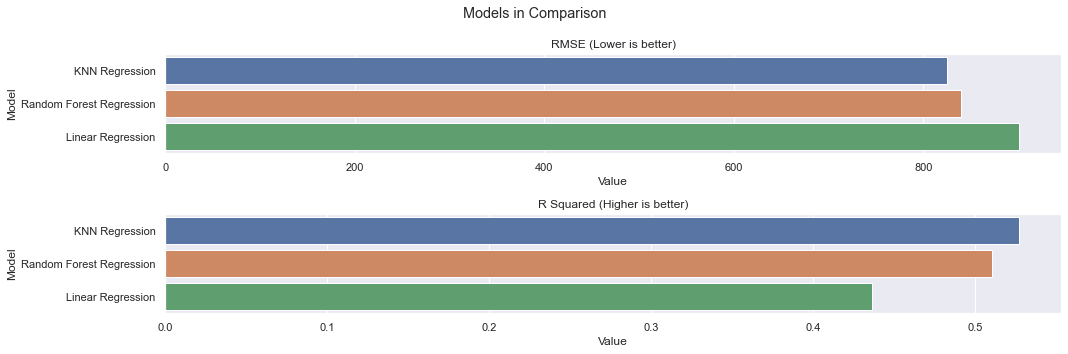

In [68]:
df_metrics_dict = {
    "KNN Regression": [min(knn_rmse), max(knn_rsquared)],
    "Linear Regression": [reg_rmse, reg_rsquared],
    "Random Forest Regression": [min(regrf_rmse), max(regrf_rsquared)],
    "Metric": ['RMSE', 'R Squared']
}
df_metrics = pd.DataFrame(df_metrics_dict)
df_metrics = df_metrics.melt(id_vars=['Metric'], value_vars=
                             ['KNN Regression', 'Linear Regression', "Random Forest Regression"],
                            var_name='Model', value_name='Value')

fig, axes = plt.subplots(2, 1)
sns.barplot(data=df_metrics[df_metrics['Metric'] == 'RMSE'].sort_values(by='Value'), 
            x='Value', y='Model', orient='h', ax=axes[0])
axes[0].set_title('RMSE (Lower is better)')
sns.barplot(data=df_metrics[df_metrics['Metric'] == 'R Squared'].\
            sort_values(by='Value', ascending=False), 
            x='Value', y='Model', orient='h', ax=axes[1])
axes[1].set_title('R Squared (Higher is better)')

fig.suptitle('Models in Comparison')
fig.set_figheight(5)
fig.set_figwidth(15)
fig.tight_layout()

#### KNN Metrics

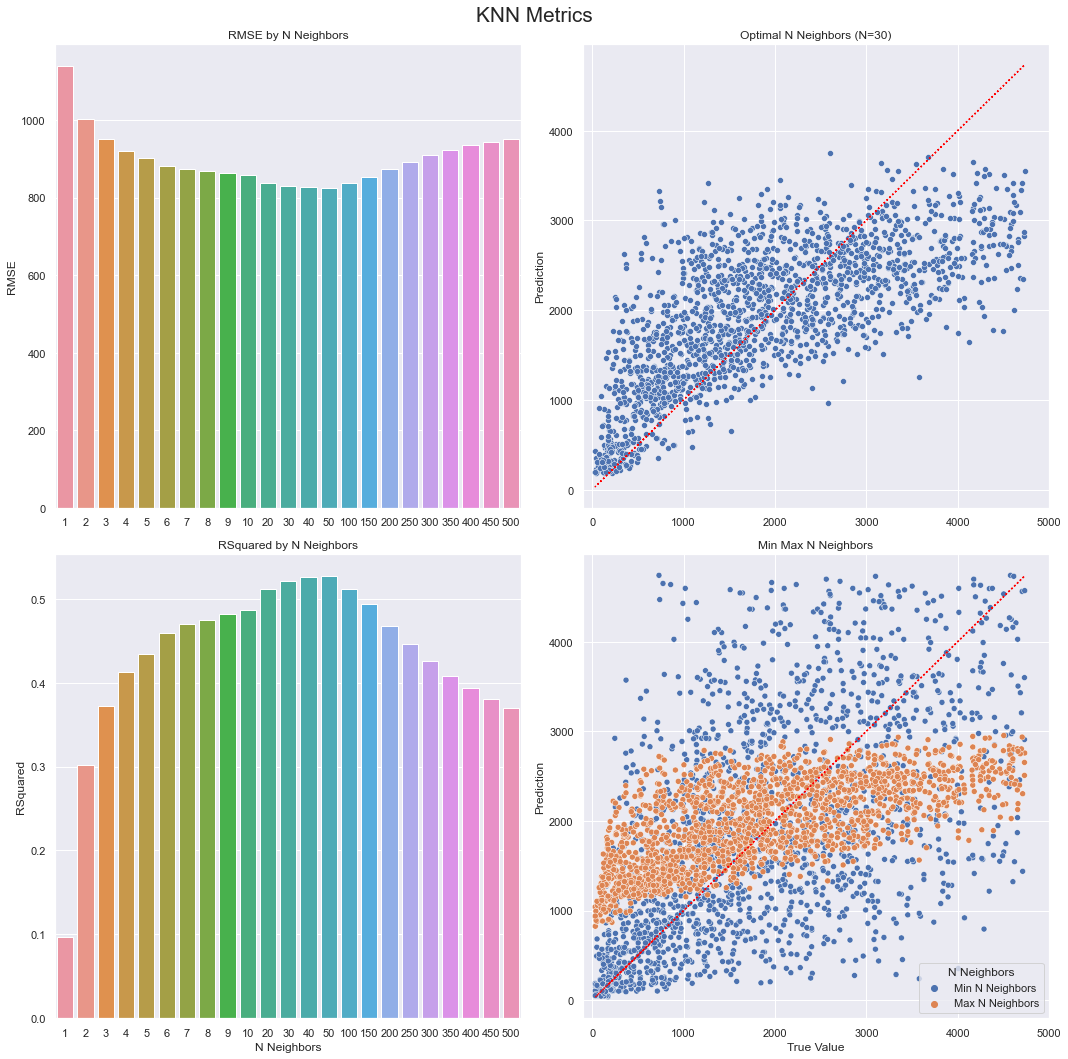

In [69]:
fig, ax = plt.subplots(2,2)
fig.set_figheight(15)
fig.set_figwidth(15)
fig.suptitle('KNN Metrics', fontsize='xx-large')
ax0, ax1, ax2, ax3 = ax[0,0], ax[0,1], ax[1,0], ax[1,1]

# Plotting RSquared and MSE by N Neighbors.
sns.barplot(x=knn_range, y=knn_rsquared, ax=ax2)
ax2.set_xlabel('N Neighbors')
ax2.set_ylabel('RSquared')
ax2.set_title('RSquared by N Neighbors')
sns.barplot(x=knn_range, y=knn_rmse, ax=ax0)
ax0.set_ylabel('RMSE')
ax0.set_title('RMSE by N Neighbors')

# Performance of optimal N.
sns.scatterplot(x=y_test, y=knn_pred_dict[30], ax=ax1)
ax1.plot(y_test, y_test, ls=":", c="red")
ax1.set_ylabel('Prediction')
ax1.set_xlim(-100,5000)
ax1.set_title('Optimal N Neighbors (N=30)')

# Comparing Max N (High Bias) and Min N (High variance)
temp_df_dict = {'True Value':y_test, 
           'Max N Neighbors':knn_pred_dict[max(knn_range)],
           'Min N Neighbors':knn_pred_dict[min(knn_range)]
          }
temp_df = pd.DataFrame(temp_df_dict)
temp_df = temp_df.melt(id_vars=['True Value'], value_vars=['Min N Neighbors', 'Max N Neighbors'],
                      var_name='N Neighbors', value_name='Prediction')
sns.scatterplot(data=temp_df, x='True Value', y='Prediction', hue='N Neighbors', ax=ax3)
ax3.plot(y_test, y_test, ls=":", c="red")
ax3.set_title('Min Max N Neighbors')
ax3.set_xlim(-100,5000)


fig.tight_layout()

#### Linear Regression Metrics

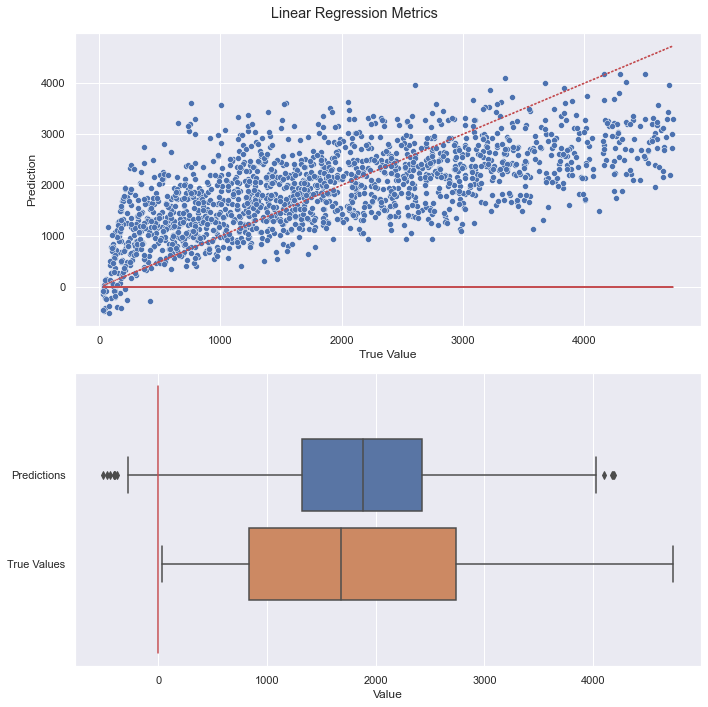

In [70]:
fig, ax = plt.subplots(2, 1)
ax0, ax1 = ax[0], ax[1]
ax0 = sns.scatterplot(y=reg_predictions, x=y_test, ax=ax0)
ax0.plot(y_test, y_test, ls=':', c='r')
ax0.plot(y_test, [0]*len(y_test), ls='-', c='r')
ax0.set_xlabel('True Value')
ax0.set_ylabel('Prediction')

temp_df = pd.DataFrame(
    {"Predictions": reg_predictions, "True Values": y_test}
)
ax1 = sns.boxplot(data=temp_df, orient='h')
ax1.plot([0,0], [-1, 2], ls='-', c='r')
ax1.set_xlabel('Value')

fig.suptitle('Linear Regression Metrics')
fig.set_figwidth(10)
fig.set_figheight(10)
fig.tight_layout()

#### Random Forest Metrics

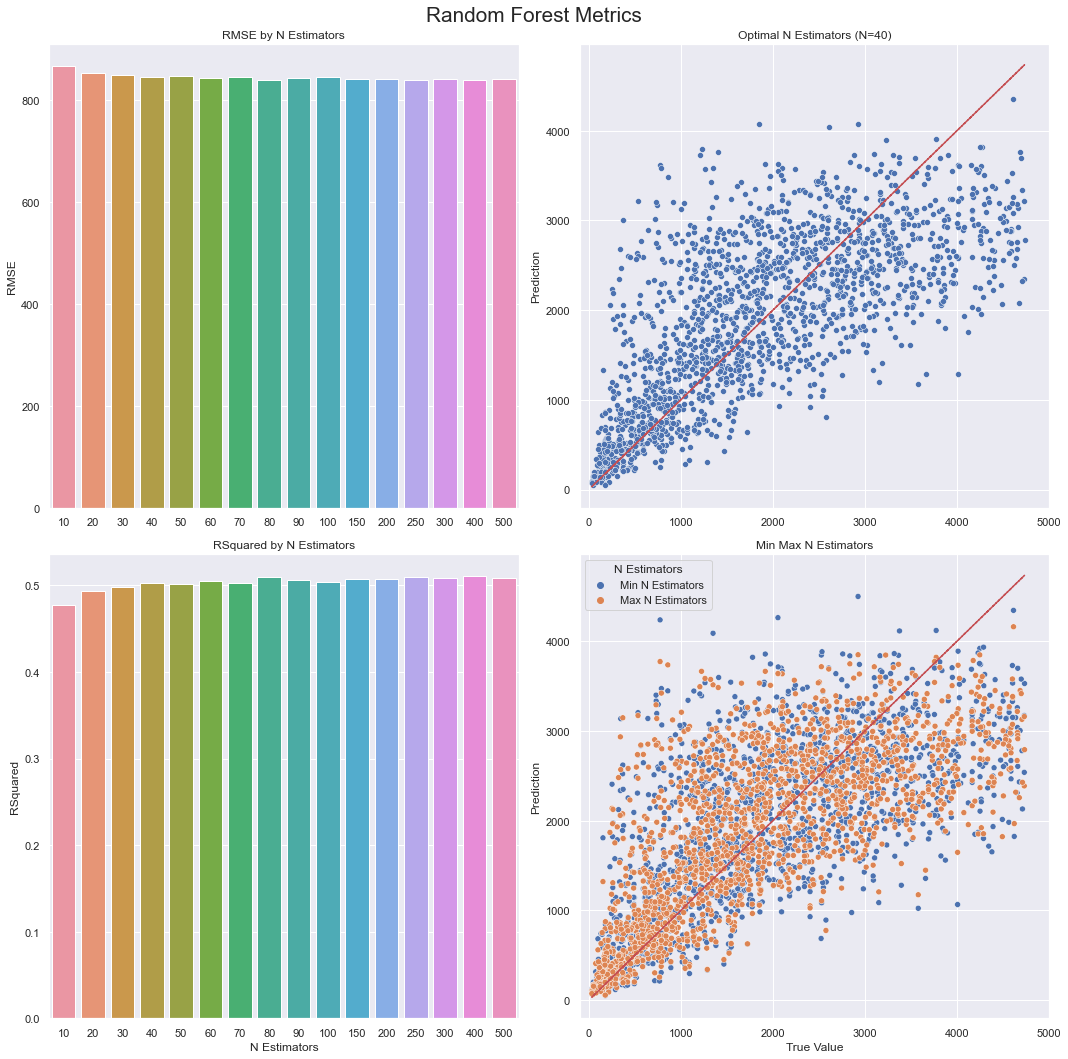

In [71]:
fig, ax = plt.subplots(2,2)
fig.set_figheight(15)
fig.set_figwidth(15)
fig.suptitle('Random Forest Metrics', fontsize='xx-large')
ax0, ax1, ax2, ax3 = ax[0,0], ax[0,1], ax[1,0], ax[1,1]

# RMSE and RSquared
sns.barplot(x=estimators_range, y=regrf_rmse, ax=ax0)
sns.barplot(x=estimators_range, y=regrf_rsquared, ax=ax2)
ax2.set_xlabel('N Estimators')
ax2.set_ylabel('RSquared')
ax0.set_ylabel('RMSE')
ax2.set_title('RSquared by N Estimators')
ax0.set_title('RMSE by N Estimators')

# Optimal Random Forest Predictions
sns.scatterplot(x=y_test, y=regrf_pred_dict[40], ax=ax1)
ax1.plot(y_test, y_test, ls='--', c='r')
ax1.set_ylabel('Prediction')
ax1.set_title('Optimal N Estimators (N=40)')
ax1.set_xlim(-100,5000)

# Comparing Max N and Min N Performance
temp_df_dict = {'True Value':y_test, 
           'Max N Estimators':regrf_pred_dict[max(estimators_range)],
           'Min N Estimators':regrf_pred_dict[min(estimators_range)]
          }
temp_df = pd.DataFrame(temp_df_dict)
temp_df = temp_df.melt(id_vars=['True Value'], value_vars=['Min N Estimators', 'Max N Estimators'],
                      var_name='N Estimators', value_name='Prediction')
sns.scatterplot(data=temp_df, x='True Value', y='Prediction', hue='N Estimators', ax=ax3)
ax3.plot(y_test, y_test, ls='--', c='r')
ax3.set_title('Min Max N Estimators')
ax3.set_xlim(-100,5000)

fig.tight_layout()

#### Model Comparison with Optimal Parameters

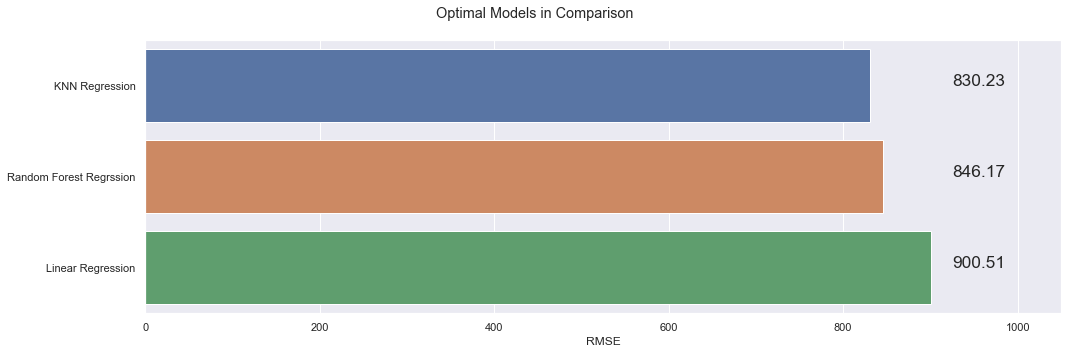

In [72]:
fig, ax = plt.subplots(1, 1)
labels = ['KNN Regression', 'Random Forest Regrssion', 'Linear Regression']
rmse = [knn_30_rmse, regrf_40_rmse, reg_rmse]

ax = sns.barplot(y=labels, x=rmse)
ax.set_xlim(0, 1050)
ax.set_xlabel('RMSE')
for i in range(len(labels)):
    ax.text(x=925, y=i, s=round(rmse[i], 2), fontsize='x-large')

fig.suptitle('Optimal Models in Comparison')
fig.set_figwidth(15)
fig.set_figheight(5)
fig.tight_layout()

#### Optimal Models Prediction Comparison

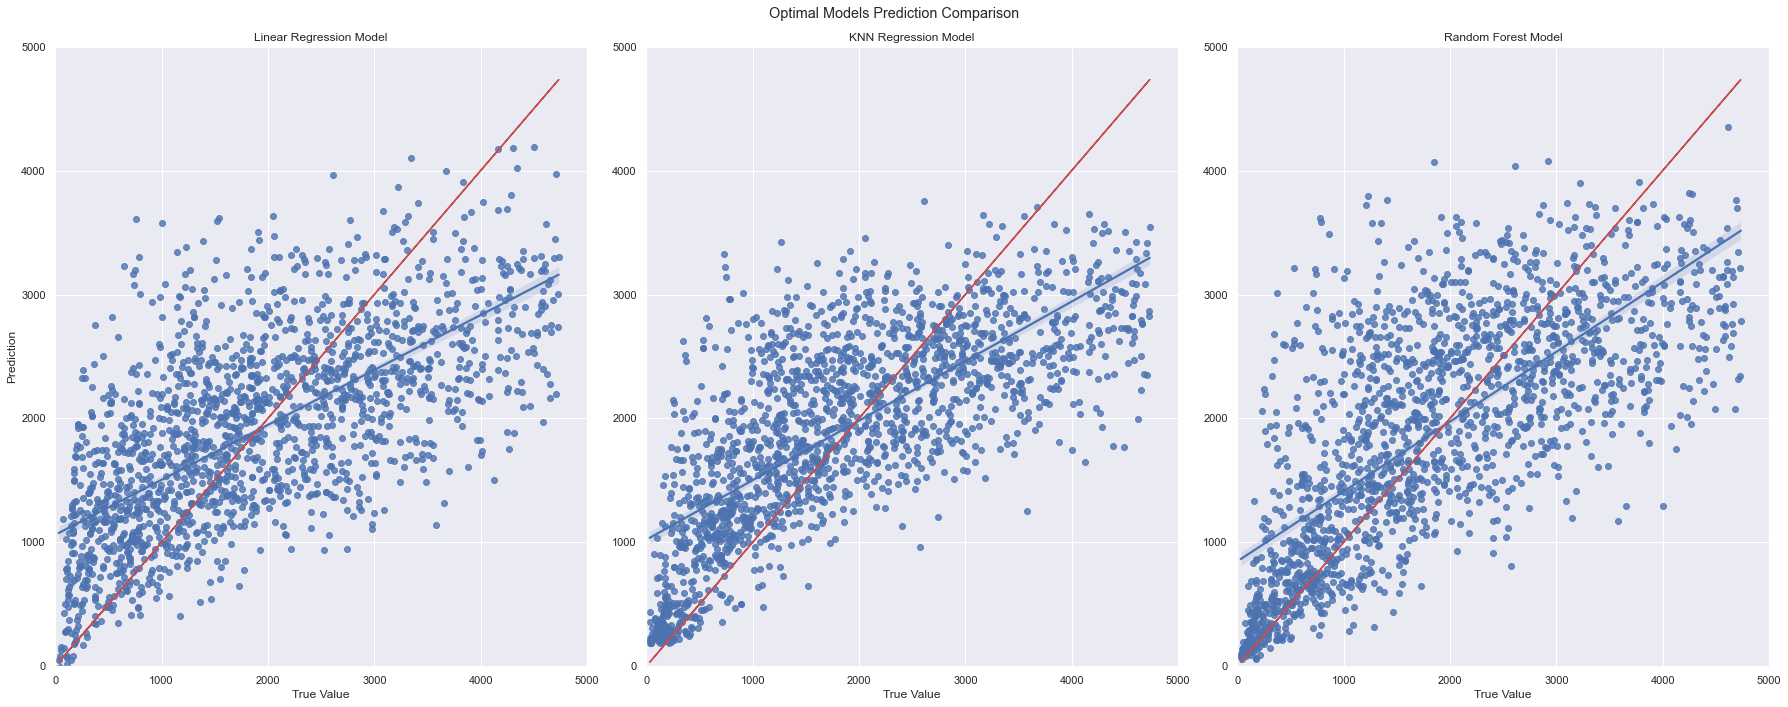

In [78]:
fig, ax = plt.subplots(1, 3)
ax0, ax1, ax2 = ax[0], ax[1], ax[2]

# Linear Regression
sns.regplot(x=y_test, y=reg_predictions, ax=ax0)
ax0.plot(y_test, y_test, ls='-', c='r')
ax0.set(
    title='Linear Regression Model',
    xlabel=('True Value'),
    ylabel='Prediction',
    ylim=(0,5000),
    xlim=(0, 5000)
)

# KNN Regression
sns.regplot(x=y_test, y=knn_pred_dict[30], ax=ax1)
ax1.plot(y_test, y_test, ls='-', c='r')
ax1.set(
    title='KNN Regression Model',
    xlabel=('True Value'),
    ylim=(0,5000),
    xlim=(0, 5000)
)

# Random Forest Regression
sns.regplot(x=y_test, y=regrf_pred_dict[40], ax=ax2)
ax2.plot(y_test, y_test, ls='-', c='r')
ax2.set(
    title='Random Forest Model',
    xlabel=('True Value'),
    ylim=(0,5000),
    xlim=(0, 5000)
)

fig.suptitle('Optimal Models Prediction Comparison')
fig.set(figwidth=25, figheight=10)
fig.tight_layout()

# Feature Importance

Feature importance can be derived from the models

Source:
https://machinelearningmastery.com/calculate-feature-importance-with-python/

In [74]:
# KNN Feature Importance
results = permutation_importance(knn_30, X_test, y_test, n_jobs=-1)
knn_importance = results.importances_mean

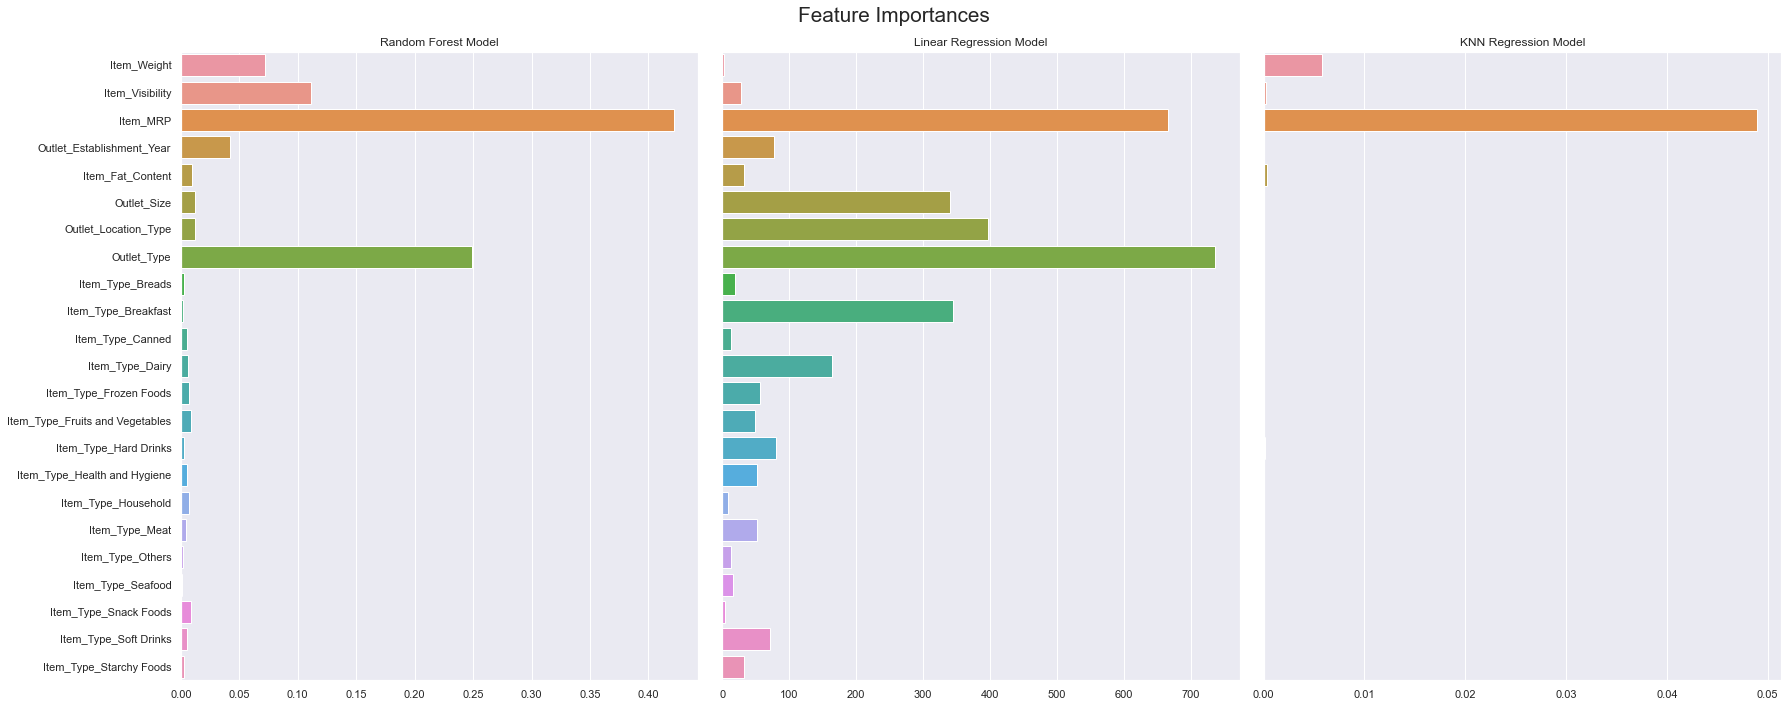

In [75]:
fig, ax = plt.subplots(1, 3)
ax0, ax1, ax2 = ax[0], ax[1], ax[2]

# Random Forest Model
sns.barplot(x=regrf.feature_importances_, y=df.columns, ax=ax0)
ax0.set_title('Random Forest Model')

# Linear Regression Model
sns.barplot(x=abs(reg.coef_), y=df.columns, ax=ax1)
ax1.set(yticklabels=[])
ax1.set_title('Linear Regression Model')

# KNN Regression
sns.barplot(x=abs(knn_importance), y=df.columns, ax=ax2)
ax2.set(yticklabels=[])
ax2.set_title('KNN Regression Model')

fig.suptitle('Feature Importances', fontsize='xx-large')
fig.set_figwidth(25)
fig.set_figheight(10)
fig.tight_layout()